### IMPORTS

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### DATA

In [8]:
df = pd.read_csv('heart.csv')

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df['target'].unique()

array([1, 0], dtype=int64)

### EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='target', ylabel='count'>

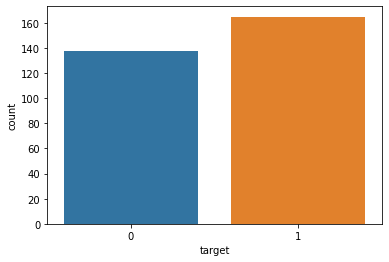

In [13]:
sns.countplot(x= 'target', data = df)

<AxesSubplot:xlabel='target', ylabel='age'>

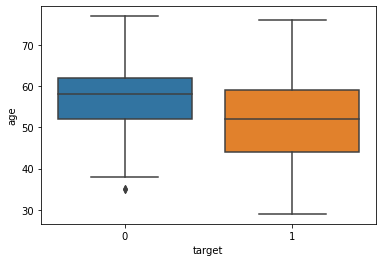

In [14]:
sns.boxplot(x='target', y='age', data=df)

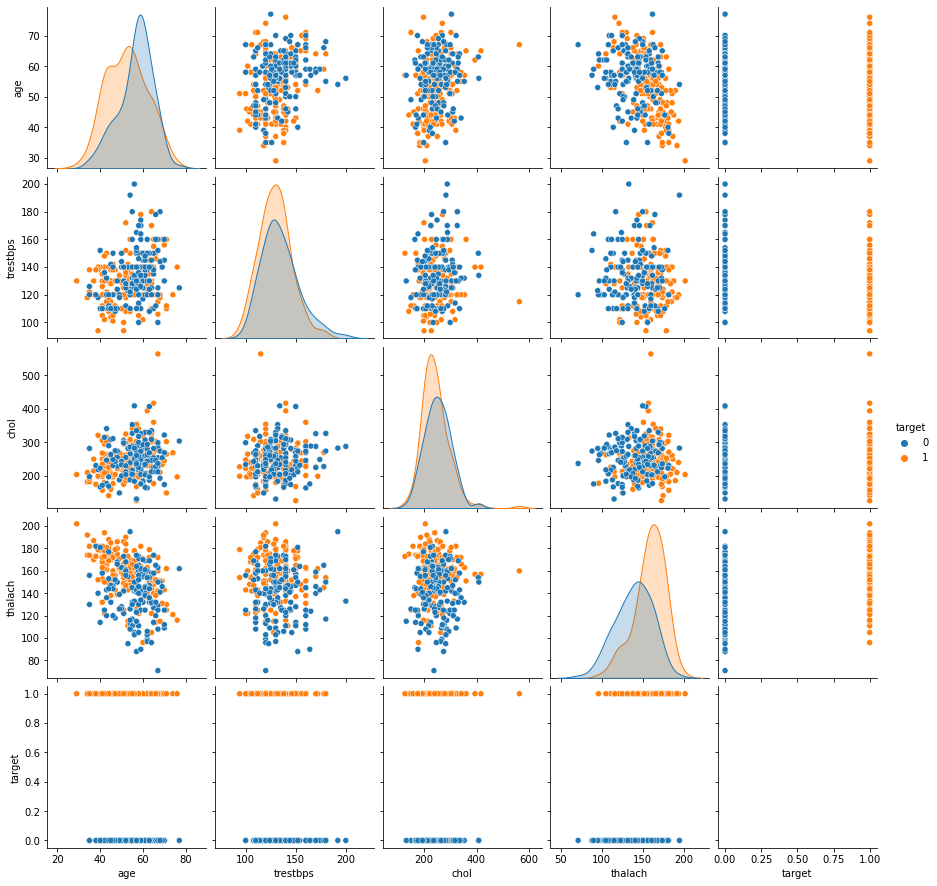

In [15]:
sns.pairplot(data=df, hue='target', vars=['age','trestbps', 'chol','thalach','target'])

<AxesSubplot:>

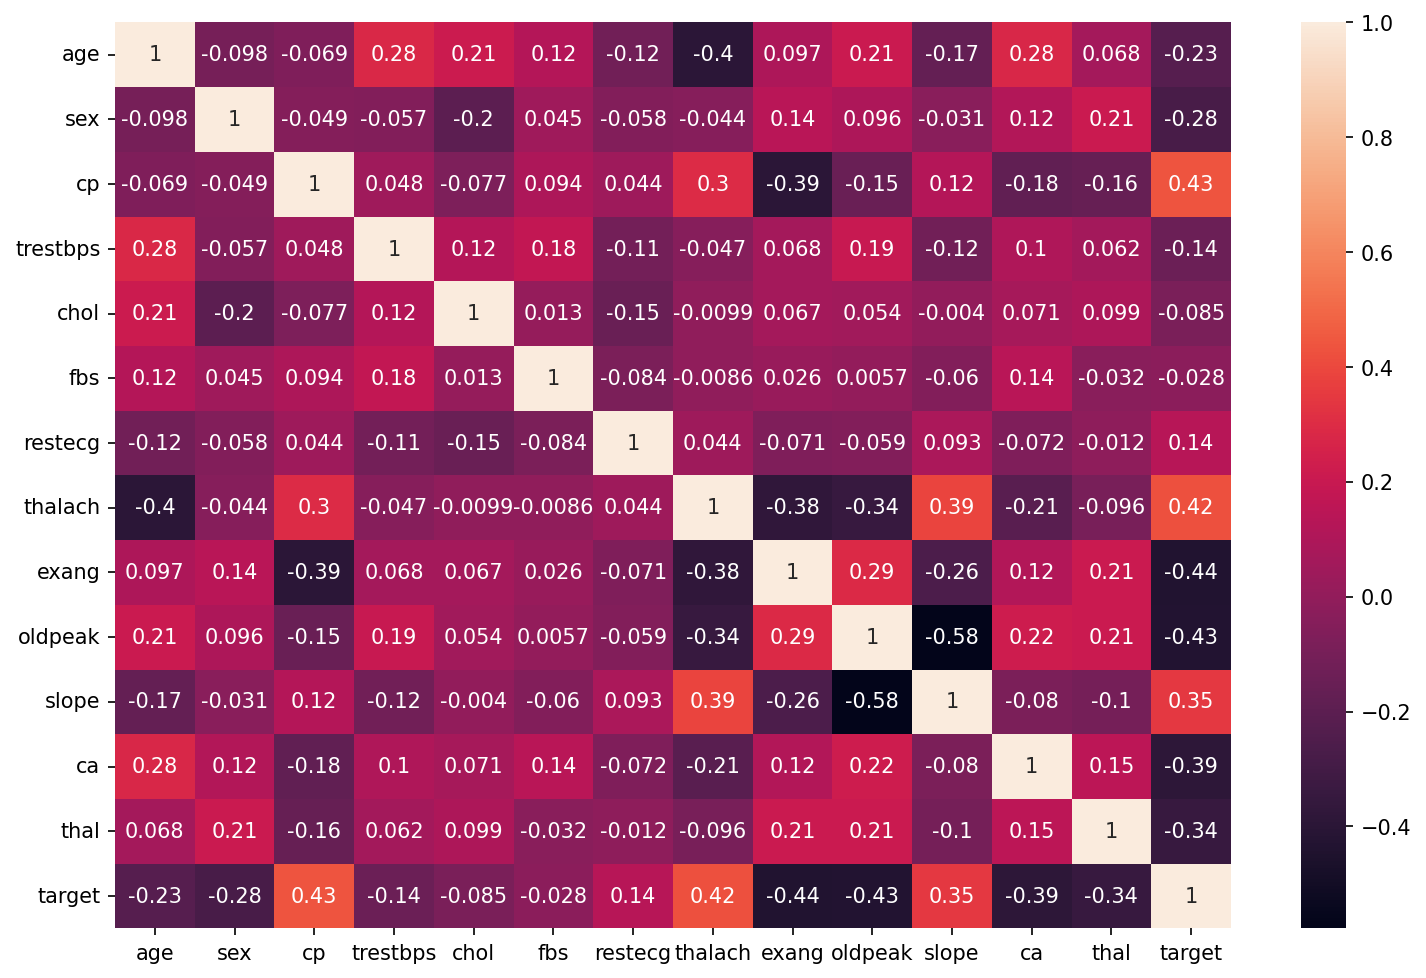

In [16]:
plt.figure(dpi = 150, figsize=(12,8))
sns.heatmap(df.corr(), annot = True )

### TRAIN TEST SPLIT AND SCALING 

In [17]:
X = df.drop('target', axis = 1)

In [18]:
y = df['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaled_X_train = scaler.fit_transform(X_train)

In [24]:
scaled_X_test = scaler.transform(X_test)

### LINEAR REGRESSION MODEL

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [28]:
log_model.coef_

array([[-0.07200459, -0.73512355,  0.89380134, -0.26263404, -0.21252883,
         0.04626827,  0.12005867,  0.4336183 , -0.42815523, -0.5261547 ,
         0.38193418, -0.85118686, -0.57463534]])

In [29]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

##### MODEL PERFORMANCE EVALUATION

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

In [31]:
accuracy_score(y_test, y_pred)

0.8387096774193549

In [32]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


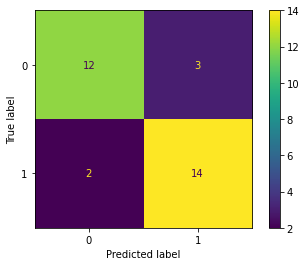

In [34]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### LINEAR REGRESSION CV MODEL

In [39]:
from sklearn.linear_model import LogisticRegressionCV

In [40]:
log_model_cv = LogisticRegressionCV()

In [41]:
log_model_cv.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [42]:
log_model_cv.C_

array([0.04641589])

In [43]:
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
log_model_cv.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [45]:
coefs = pd.Series(index = X.columns, data=log_model.coef_[0])

In [46]:
coefs = coefs.sort_values()

<AxesSubplot:>

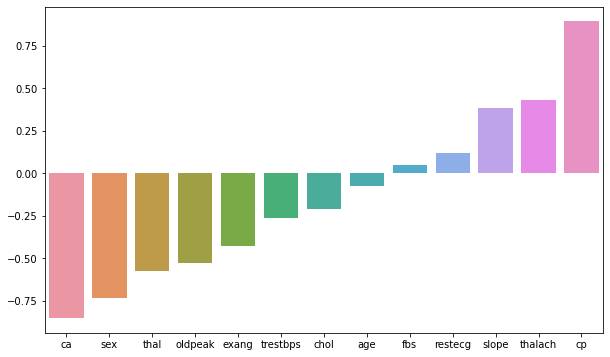

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values)

In [48]:
y_pred_cv = log_model_cv.predict(scaled_X_test)
y_pred_cv

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

##### MODEL PERFORMANCE EVALUATION

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

In [50]:
accuracy_score(y_test, y_pred_cv)

0.8387096774193549

In [51]:
confusion_matrix(y_test,y_pred_cv)

array([[12,  3],
       [ 2, 14]], dtype=int64)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


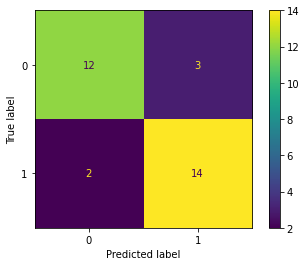

In [52]:
plot_confusion_matrix(log_model_cv,scaled_X_test,y_test)

In [53]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### PREFORMANCE CURVES

In [54]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


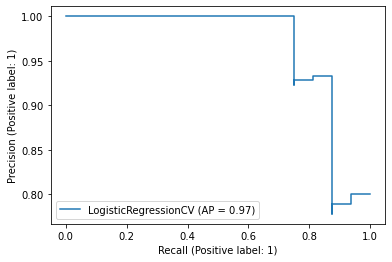

In [55]:
plot_precision_recall_curve(log_model_cv,scaled_X_test, y_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


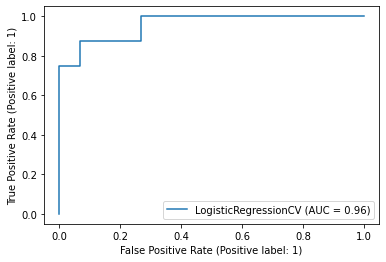

In [56]:
plot_roc_curve(log_model_cv,scaled_X_test, y_test)